# Network X - Structural Properties

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

This notebook follows the "fundamentals" notebook and introduces the following concepts:

- Clustering coefficient.
- Node centrality.
- Robustness of networks.

This tutorial is based on "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master). Please take a look at the folder [references/networkx_indiana](../../references/networkx_indiana/) for more information.


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import random

---


## Clustering Coefficient


The **clustering coefficient** of a node is a measure of how well its neighbors are connected to each other. It is defined as:

$$
C_i = \frac{2e_i}{k_i(k_i - 1)}
$$

where $e_i$ is the number of edges between the neighbors of node $i$, and $k_i$ is the number of neighbors of node $i$.


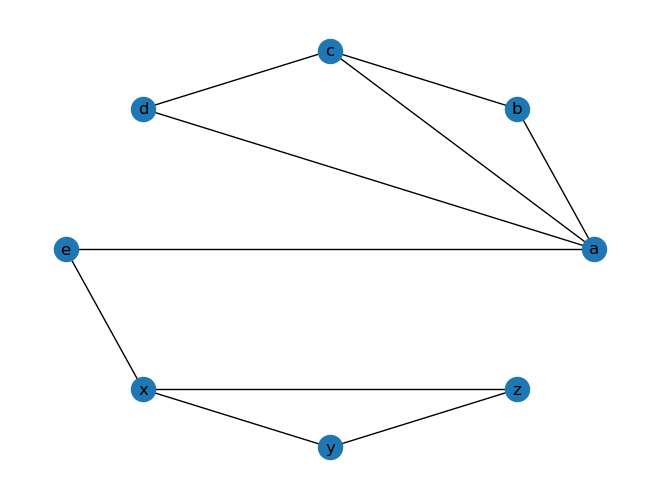

In [15]:
# Initialize an empty graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
        ("e", "x"),
    ]
)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

In [16]:
# Clustering coefficient of each node
for node in G.nodes():
    print(f"Clustering coefficient of '{node}': {nx.clustering(G, node)}")

Clustering coefficient of 'a': 0.3333333333333333
Clustering coefficient of 'b': 1.0
Clustering coefficient of 'c': 0.6666666666666666
Clustering coefficient of 'd': 1.0
Clustering coefficient of 'e': 0
Clustering coefficient of 'x': 0.3333333333333333
Clustering coefficient of 'y': 1.0
Clustering coefficient of 'z': 1.0


The clustering coefficient of a graph is the average of the clustering coefficients of all its nodes.


In [17]:
# Clustering coefficient of the whole graph
print(f"Clustering coefficient of the graph: {nx.average_clustering(G)}")

Clustering coefficient of the graph: 0.6666666666666667


**Relevance.** The clustering coefficient is a measure of the extent to which a network is composed of tightly knit groups. It is a measure of the extent to which nodes tend to cluster together.


---


## Centrality


The **degree centrality** of a node is the fraction of nodes it is connected to. It is defined as:

$$
C_D(i) = \frac{k_i}{N - 1}
$$

where $k_i$ is the degree of node $i$, and $N$ is the total number of nodes in the graph.


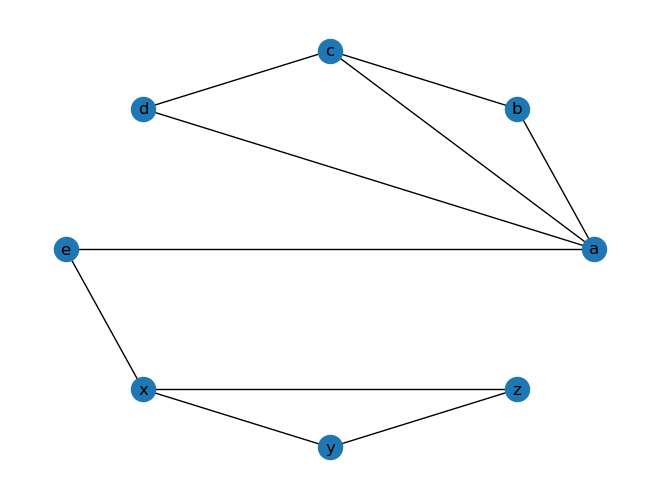

{'a': 0.5714285714285714,
 'b': 0.2857142857142857,
 'c': 0.42857142857142855,
 'd': 0.2857142857142857,
 'e': 0.2857142857142857,
 'x': 0.42857142857142855,
 'y': 0.2857142857142857,
 'z': 0.2857142857142857}

In [18]:
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

d_centrality = nx.centrality.degree_centrality(G)
d_centrality

The **betweenness centrality** of a node is the fraction of shortest paths between all pairs of nodes that pass through that node. It is defined as:

$$
C_B(i) = \sum_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}
$$

where $\sigma_{st}$ is the total number of shortest paths between nodes $s$ and $t$, and $\sigma_{st}(i)$ is the number of those paths that pass through node $i$.


In [19]:
d_centrality = nx.centrality.betweenness_centrality(G)
d_centrality

{'a': 0.5952380952380952,
 'b': 0.0,
 'c': 0.023809523809523808,
 'd': 0.0,
 'e': 0.5714285714285714,
 'x': 0.47619047619047616,
 'y': 0.0,
 'z': 0.0}

It is informative to plot the distribution of centrality values across all nodes in the graph.


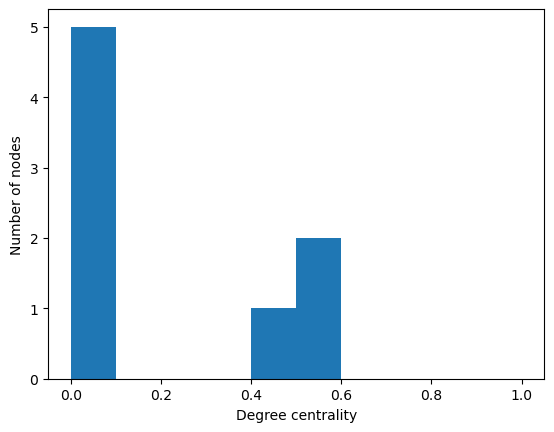

In [20]:
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.xlabel("Degree centrality")
plt.ylabel("Number of nodes")
plt.show()

**Relevance.** Centrality measures are used to identify the most important nodes in a network. They are used to identify the most influential nodes in a network, the nodes that are most likely to spread information or disease, etc.


---


## Exercise: Enron Email Network

Look at the Enron executive email graph.


Graph with 143 nodes and 623 edges


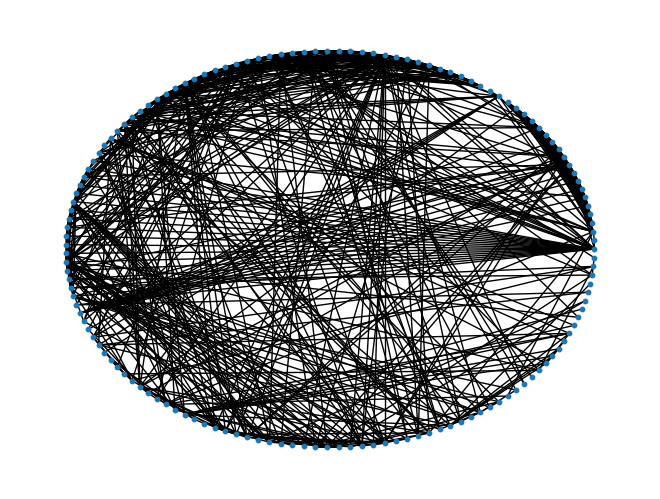

In [21]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

# Basic information about the graph
print(G)

# Visualize the graph
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10)
plt.show()

**Exercise.** Who are the most central nodes in the network according to degree centrality? Who are the most central nodes according to betweenness centrality? Plot the distribution of degree and betweenness centralities across all nodes.


**Exercise.** Are there communities of employees who mostly communicate with each other? If so, who are the most central employees in each community?


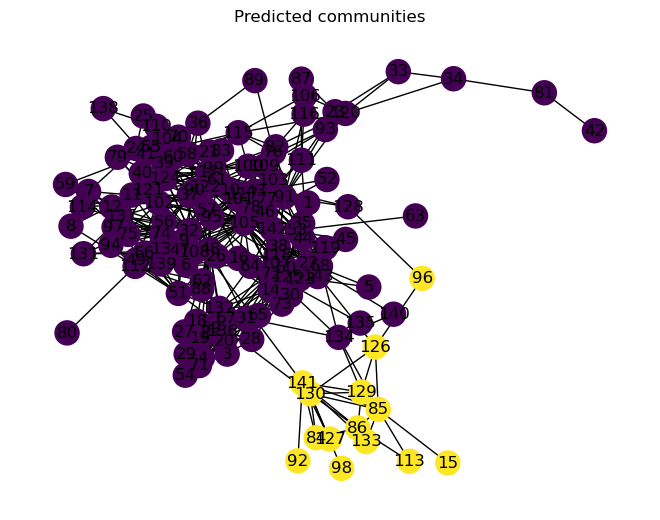

Modularity: 0.08203973421207882


In [22]:
# We can use Girvan-Newman algorithm to detect communities in a graph
# This algorithm is based on edge betweenness
# The algorithm returns an iterator over partitions of the graph
gen_partitions = nx.community.girvan_newman(G)
# Each partition is a tuple of sets of nodes
cluster_partition = next(gen_partitions)

pos = nx.layout.spring_layout(G)
node_colors = []
for node in G.nodes():
    for color, cluster in enumerate(cluster_partition):
        if node in cluster:
            node_colors.append(color)
            break
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title("Predicted communities")
plt.show()

# We can use modularity to evaluate the quality of the partition
# A value of 0 means that the partition is random
# A value of 1 means that the partition is perfect
quality = nx.community.quality.modularity(G, cluster_partition)
print("Modularity:", quality)

**Exercise.** Does the network show a small-world or scale-free structure?


---


## Robustness


To test the robustness of a network, we can remove nodes or edges and see how the network changes. We can measure the size of the largest connected component as we remove nodes or edges.


Graph with 143 nodes and 623 edges


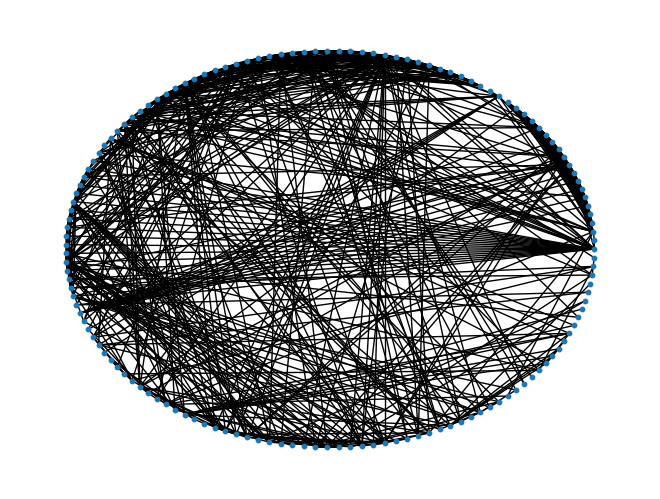

In [23]:
# Load the graph
G = nx.read_edgelist("../../data/ia-enron-only/ia-enron-only.edges", nodetype=int)

# Basic information about the graph
print(G)

# Visualize the graph
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10)
plt.show()

### Random Failure


To simulate random failure, we remove nodes or edges at random. Every time we remove a node or edge, we measure the size of the largest connected component.


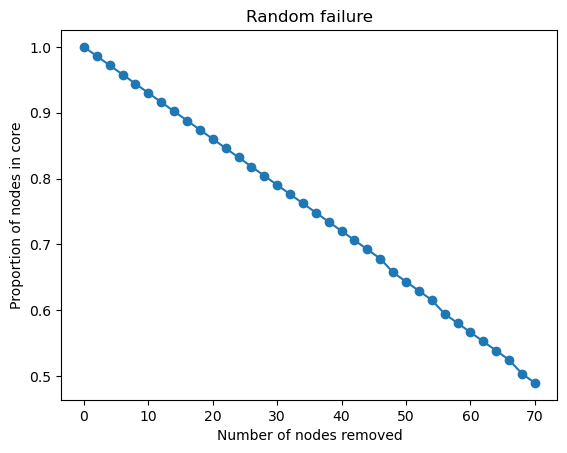

In [24]:
# Store the original number of nodes
num_nodes = G.number_of_nodes()
# Minimum number of nodes to keep
min_num_nodes = num_nodes // 2
# Nodes to remove each time
num_nodes_to_remove = 2

# Make a copy of the graph
C: nx.Graph = G.copy()

# Initialize a list to store the relative size of the core
random_attack_core_proportions = []
random_attack_nodes_removed = []

# Remove nodes one by one
while C.number_of_nodes() > min_num_nodes:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / num_nodes
    random_attack_core_proportions.append(core_proportion)
    random_attack_nodes_removed.append(num_nodes - C.number_of_nodes())
    # Remove one random node
    nodes_to_remove = random.sample(list(C.nodes), num_nodes_to_remove)
    C.remove_nodes_from(nodes_to_remove)

plt.title("Random failure")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(random_attack_nodes_removed, random_attack_core_proportions, marker="o")
plt.show()
plt.close()

### Targeted Attack


During a targeted attack, we remove nodes or edges in order of decreasing centrality. Every time we remove a node or edge, we measure the size of the largest connected component.


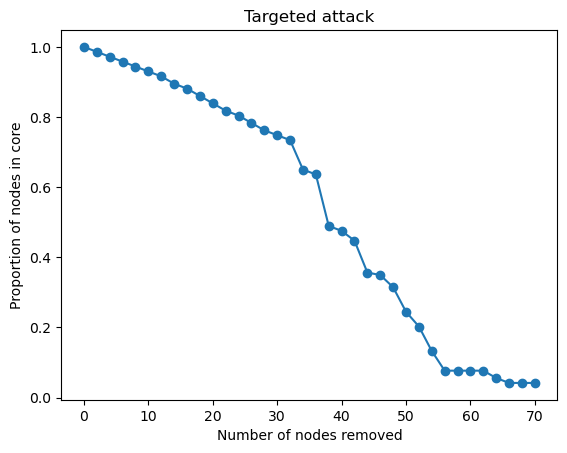

In [25]:
# Store the original number of nodes
num_nodes = G.number_of_nodes()
# Minimum number of nodes to keep
min_num_nodes = num_nodes // 2
# Nodes to remove each time
num_nodes_to_remove = 2

# Make a copy of the graph
C: nx.Graph = G.copy()

# Initialize a list to store the relative size of the core
targeted_attack_core_proportions = []
targeted_attack_nodes_removed = []

# Remove nodes one by one
while C.number_of_nodes() > min_num_nodes:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / num_nodes
    targeted_attack_core_proportions.append(core_proportion)
    targeted_attack_nodes_removed.append(num_nodes - C.number_of_nodes())
    # Remove nodes with the highest degree
    # First, we sort the nodes by their degree
    nodes_to_remove = sorted(C.degree, key=lambda x: x[1], reverse=True)
    # Then, we remove the first N nodes
    nodes_to_remove = nodes_to_remove[:num_nodes_to_remove]
    C.remove_nodes_from([node for node, _ in nodes_to_remove])

plt.title("Targeted attack")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(targeted_attack_nodes_removed, targeted_attack_core_proportions, marker="o")
plt.show()
plt.close()

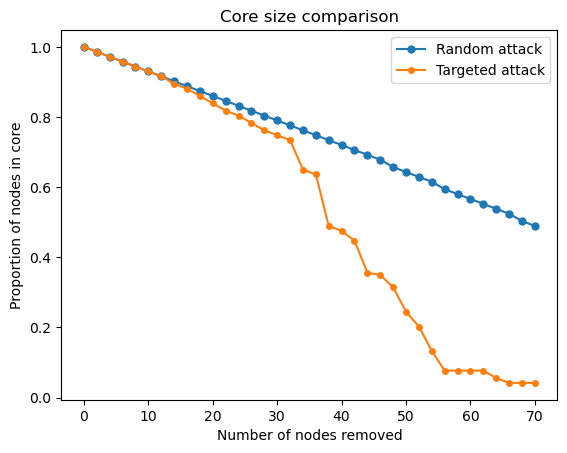

In [30]:
# Compare the two strategies
plt.title("Core size comparison")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.plot(
    random_attack_nodes_removed,
    random_attack_core_proportions,
    label="Random attack",
    marker="o",
    markersize=5,
)
plt.plot(
    targeted_attack_nodes_removed,
    targeted_attack_core_proportions,
    label="Targeted attack",
    marker="o",
    markersize=4,
)
plt.legend()
plt.show()
plt.close()

---
